<a href="https://colab.research.google.com/github/bipinthecoder/machine-learning-basics/blob/main/ml_vectors_matrices_arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Numpy?** 

- NumPy provides efficient storage(less memory) and better ways of handling data for Mathematical Operations
- NumPy is meant for creating homogeneous n-dimensional arrays (n = 1..n). Unlike Python lists, all elements of a NumPy array should be of same type
- The dimensions of the array can be changed at runtime as long as the multiplicity factor produces the same number of elements. For example, a 2 * 5 matrix can be converted into 5 * 2 and a 1 * 4 into 2 * 2. This can be done by calling the NumPy .reshape(...) function on the arrays.
- As .reshape(x,y) can convert an array into multi dimensional array, similarly, its possible to create a single dimensional array from any any multi dimensional array using the function .ravel()
- NumPy n-dimensional arrays makes it extremely easy to perform mathematical operations on it


In [1]:
import numpy as np

**Creating a Vector**

In [ ]:
#Vector as a row
vector_row = np.array([1,2,3])

#Vector as a column
vector_col = np.array([[1],
                      [2],
                      [3]])

**Creating a Matrix**

In [ ]:
matrix = np.array([[1,2],
                  [3,4],
                  [5,6]])
np.ndim(matrix)

2

Numpy has a matrix data structure which can be accessed using **np.mat**      However, this is rarely used as the de facto standard data structures of Numpy are arrays and most Numpy operations return arrays and not matrix objects.

In [ ]:
matrix_object = np.mat([[1, 2],
                        [1, 2],
                        [1, 2]])
matrix_object

matrix([[1, 2],
        [1, 2],
        [1, 2]])

**Creating a Sparse Matrix**

A sparse matrix or sparse array is a matrix in which most of the elements are zero. Sparse matirces only store non-zero elements and assume all other values are zero. This helps in significant computational savings.

Many dataset in real world has zero as most of the elements. Hence Sparse matrix will be of great use to store data with very few non-zero elements.

Matrices where most of the values are non-zero called **dense matrices**.

The amount of sparsity of a matrix can be calculated as follows:

**sparsity = count zero elements / total elements**
Ex: A small 3 x 6 sparse matrix.

     1, 0, 0, 1, 0, 0
    A = (0, 0, 2, 0, 0, 1)
     0, 0, 0, 2, 0, 0

The example has 13 zero values of the 18 elements in the matrix, giving this matrix a sparsity score of 0.722 or about 72%
  


**Working with Sparse Matrix**

The zero values can be ignored and only the data or non-zero values in the sparse matrix need to be stored or acted upon.

There are multiple data structures that can be used to efficiently construct a sparse matrix; three common examples are listed below.

    Dictionary of Keys -> A dictionary is used where a row and column index is mapped to a value.
    List of Lists -> Each row of the matrix is stored as a list, with each sublist containing the column index and the value.
    Coordinate List -> A list of tuples is stored with each tuple containing the row index, column index, and the value.

There are also data structures that are more suitable for performing efficient operations; two commonly used examples are listed below.

    Compressed Sparse Row -> The sparse matrix is represented using three one-dimensional arrays
    for the non-zero values,
    the extents of the rows, and the column indexes.
    Compressed Sparse Column -> The same as the Compressed Sparse Row method except the 
    column indices are compressed 
    and read first before the row indices.

The Compressed Sparse Row, also called **CSR format** or **Yale format**, is often used to represent sparse matrices in machine learning given the efficient access and matrix multiplication that it supports.

**Sparse Matrix representation in a 2-D Array format.**

2D array is used to represent a sparse matrix in which there are three rows named as 

    Row: Index of row, where non-zero element is located
    Column: Index of column, where non-zero element is located
    Value: Value of the non zero element located at index – (row,column)

In [ ]:
sparseMatrix = [[0,0,3,0,4],[0,0,5,7,0],[0,0,0,0,0],[0,2,6,0,0]]
 
# initialize size as 0
size = 0
 
for i in range(4):
    for j in range(5):
        if (sparseMatrix[i][j] != 0):
            size += 1
 
# number of columns in compactMatrix(size) should
# be equal to number of non-zero elements in sparseMatrix
rows, cols = (3, size)
print(f"Size is {size}")
compactMatrix = [[0 for i in range(cols)] for j in range(rows)]
# print(compactMatrix)

k = 0
for i in range(4):
    for j in range(5):
        if (sparseMatrix[i][j] != 0):
            print(f"k is {k} and element is {sparseMatrix[i][j]}")
            compactMatrix[0][k] = i
            compactMatrix[1][k] = j
            compactMatrix[2][k] = sparseMatrix[i][j]
            k += 1
 
for i in compactMatrix:
    print(i)

Many linear algebra NumPy and SciPy functions that operate on NumPy arrays can transparently operate on SciPy sparse arrays. Further, machine learning libraries that use NumPy data structures can also operate transparently on SciPy sparse arrays, such as scikit-learn for general machine learning and Keras for deep learning.

A dense matrix stored in a NumPy array can be converted into a sparse matrix using the CSR representation by calling the csr_matrix() function.

In [ ]:
#Importing sparse from scipy

# SciPy is a free and open-source Python library used for scientific computing and technical computing.
# SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions,
# FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

from scipy import sparse

matrix = np.array(([0, 0],
                  [0, 1],
                  [3, 0]))


#compressed sparse row (CSR) matrix

matrix_sparse = sparse.csr_matrix(matrix)
print(matrix_sparse)


  (1, 1)	1
  (2, 0)	3


A sparse matrix can be converted to dense matrix by using todense() method

In [ ]:
dense = matrix_sparse.todense()
print(dense)

[[0 0]
 [0 1]
 [3 0]]


**Selecting Elements**

In [2]:
vector = np.array([1, 2, 3, 4, 5])

matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

Select all elements in vector

In [3]:
vector[:]

array([1, 2, 3, 4, 5])

Select all elements up to and inckuding third element in the vector

In [3]:
vector[:3]

array([1, 2, 3])

Select all elements after 3rd element

In [4]:
vector[3:]

array([4, 5])

Select last element

In [5]:
vector[-1]

5

Select first 2 rows and all columns of matrix

In [11]:
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

Select all rows and second column of matrix

In [19]:
matrix[:, 1:2]

array([[2],
       [5],
       [8]])

**Describing the Matrix**

In [27]:
matrix = np.array([[1,2,3,4],
                   [5,6,7,8],
                   [9,10,11,12]
                   ])

In [22]:
#get the no of rows and cloumns
matrix.shape

(3, 4)

In [23]:
#get the no of elements (rows * coumns)
matrix.size

12

In [ ]:
#get no of dimensions

In [28]:
matrix.ndim

2

**Numpy Vectorize**

vectorize class converts a function into a function that applies to all elements in an array or slice of array.

It acts like a for loop over the elements.


Numpy broadcasting can be used to used to perform operations when dimensions are not the same. The one dimensional array must match one dimension of the larger array. It is then repeated to make the shapes equal.

In [9]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

matrix = matrix + 100

matrix


array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

In [5]:
a = np.array([1, 2, 3])

b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

c = a*b

print(c)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]
 [10 22 36]]


In [8]:
z = np.zeros((3,3))
s = np.array([[1],[2],[3]])

print(s)

print(z)
z = z+s
print(z)

[[1]
 [2]
 [3]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [10]:
#using vectorize


matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

#creating a normal function to perform an operation
add_100 = lambda i : i + 100

#vectorizing the function
vectorized_add_100 = np.vectorize(add_100)

vectorized_add_100(matrix)



array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

**Finding Max and Min values in an array**

Numpy provides max and min functions to achieve this task

In [6]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 18, 9]])

print(f'max value in matrix is {np.max(matrix)}')
print(f'min value in matrix is {np.min(matrix)}')

max value in matrix is 18
min value in matrix is 1


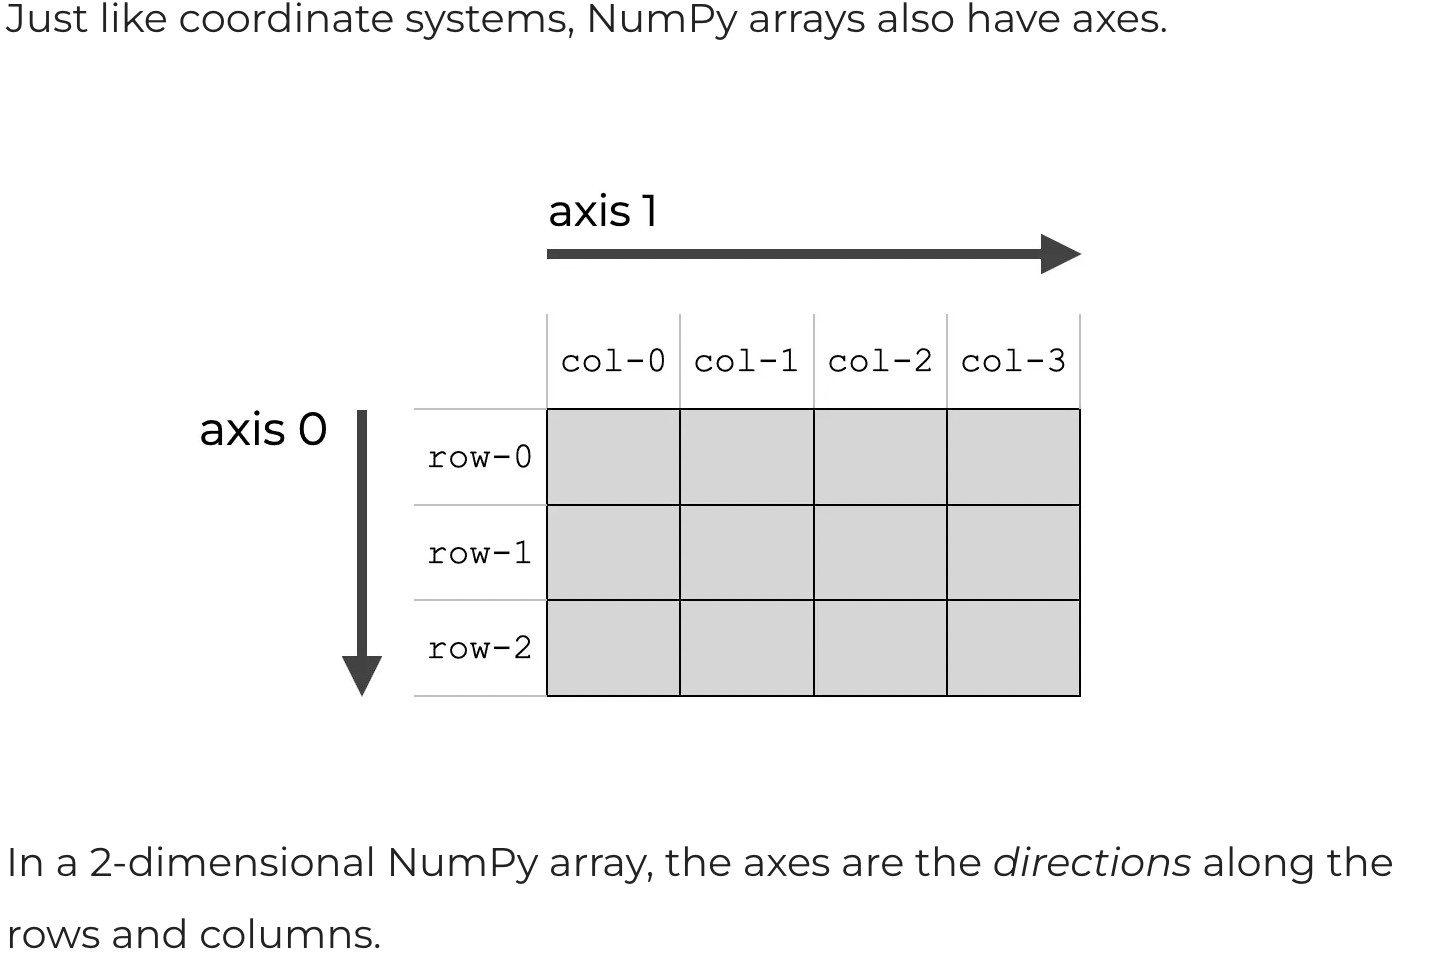

Getting Maximum element in each column

In [7]:
np.max(matrix,axis=0)

array([ 7, 18,  9])

Getting Maximum element in each row


In [8]:
np.max(matrix, axis=1)

array([ 3,  6, 18])

**Average, Variance and Standard Deviation**